## **ALIGN GUARD INTERNSHIP TASK**

**Food Quality Assessment**

* Created By : Blessy louis
* Email: blessylouis2002@gmail.com
* Created On: 31.05.2024



---



# Import Libraries

In [ ]:
!pip install polars

In [ ]:
import polars as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset


The food inspection department conducts regular inspection on food quality for various restaurants in the city. It’s a very well documented procedure and over time some good amount of data has been generated out of these inspections.

The inspection department would like to predict where they should focus most in terms of their next inspection schedule, so that they can most optimize their time at hand to catch the worst offenders. Can the past inspection or any data that they have collected predict which facility will pass or fail.

# Features:
* ID: A unique id for each inspection
* Date: The date at which the inspection was done in a particular facility
* LicenseNo: De-identified license number for a particular facility
* FacilityID: De-identified unique facility id for a facility
* FacilityName: The encoded name of a facility
* Type: The type of the facility being inspected
* Street: The encoded street where the facility is located
* City: The encoded city where the facility is located
* State: The encoded state where the facility is located
* LocationID: An encoded location feature.
* Reason: The primary reason for the inspection
* SectionViolations: Laws violated by the facility
* RiskLevel: The level of risk the facility possesses to the consumers.
* Geo_Loc: De-identified geo location of the facility
* Inspection_Results: The result of the inspection

# Target:
The inspection results can have any of the following values :
* 0:’FACILITY CHANGED’
* 1:’FAIL’
* 2:’FURTHER INSPECTION REQUIRED’,
* 3:’INSPECTION OVERRULED’
* 4:’PASS’
* 5:’PASS(CONDITIONAL)’
* 6:’SHUT-DOWN’

In [ ]:
df=pd.read_csv('foodAssessment.csv')

# EDA

In [ ]:
df.head()

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,3.110350e+13,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,1.008900e+13,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4
2,4.014900e+13,01-05-2013,18223,1112,969,RESTAURANT,14988,id-11235901,id_1890134,81883.0,CANVASS,NaN,High,locid3368,6
3,3.715770e+13,28-09-2015,20825,20007,19115,RESTAURANT,3661,id-11235901,id_1890134,81859.0,CANVASS RE-INSPECTION,31.0,Medium,locid11839,4
4,4.747800e+13,09-12-2015,2136,16867,10409,RESTAURANT,7876,id-11235901,id_1890134,81886.0,COMPLAINT,30.0,High,locid12264,4


In [ ]:
df.shape

(147443, 15)

In [ ]:
df.columns

Index(['ID', 'Date', 'LicenseNo', 'FacilityID', 'FacilityName', 'Type',
       'Street', 'City', 'State', 'LocationID', 'Reason', 'SectionViolations',
       'RiskLevel', 'Geo_Loc', 'Inspection_Results'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147443 entries, 0 to 147442
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  147443 non-null  float64
 1   Date                147443 non-null  object 
 2   LicenseNo           147443 non-null  int64  
 3   FacilityID          147443 non-null  int64  
 4   FacilityName        147443 non-null  int64  
 5   Type                143958 non-null  object 
 6   Street              147443 non-null  int64  
 7   City                147443 non-null  object 
 8   State               147443 non-null  object 
 9   LocationID          147408 non-null  float64
 10  Reason              147443 non-null  object 
 11  SectionViolations   108375 non-null  float64
 12  RiskLevel           147443 non-null  object 
 13  Geo_Loc             147443 non-null  object 
 14  Inspection_Results  147443 non-null  int64  
dtypes: float64(3), int64(5), object(7)

In [ ]:
df.dtypes

ID                    float64
Date                   object
LicenseNo               int64
FacilityID              int64
FacilityName            int64
Type                   object
Street                  int64
City                   object
State                  object
LocationID            float64
Reason                 object
SectionViolations     float64
RiskLevel              object
Geo_Loc                object
Inspection_Results      int64
dtype: object

In [ ]:
df.describe()

,ID,LicenseNo,FacilityID,FacilityName,Street,LocationID,SectionViolations,Inspection_Results
count,1.474430e+05,147443.000000,147443.000000,147443.000000,147443.000000,147408.000000,108375.000000,147443.000000
mean,2.997142e+13,17726.613003,14020.779583,13377.891009,8684.119653,81873.642156,24.129153,3.680405
std,1.154808e+13,10865.050018,7794.382869,7408.148606,5255.991577,140.248846,12.657456,1.481441
min,1.000010e+13,0.000000,0.000000,0.000000,0.000000,31259.000000,1.000000,0.000000
25%,1.994860e+13,8588.000000,7347.000000,6993.000000,4109.000000,81859.000000,14.000000,4.000000
50%,2.999150e+13,17056.000000,14256.000000,13710.000000,8541.000000,81870.000000,31.000000,4.000000
75%,3.995725e+13,26163.000000,20841.000000,19795.000000,13321.000000,81888.000000,33.000000,4.000000
max,4.999990e+13,37394.000000,27276.000000,26032.000000,17891.000000,82072.000000,70.000000,6.000000


In [ ]:
df.isnull().sum()

ID                        0
Date                      0
LicenseNo                 0
FacilityID                0
FacilityName              0
Type                   3485
Street                    0
City                      0
State                     0
LocationID               35
Reason                    0
SectionViolations     39068
RiskLevel                 0
Geo_Loc                   0
Inspection_Results        0
dtype: int64

Handling Null Values

In [ ]:
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

# Replace NaN in 'LocationID' with 0
df['LocationID'].fillna(0, inplace=True)

# Replace NaN in 'SectionViolations' with the mode of the column
df['SectionViolations'].fillna(df['SectionViolations'].median(), inplace=True)

# Display the cleaned DataFrame
print(df)

                  ID        Date  LicenseNo  FacilityID  FacilityName  \
0       3.110350e+13  26-04-2010       4744        8123          7715   
1       1.008900e+13  21-06-2009       2973       12268         11664   
2       4.014900e+13  01-05-2013      18223        1112           969   
3       3.715770e+13  28-09-2015      20825       20007         19115   
4       4.747800e+13  09-12-2015       2136       16867         10409   
...              ...         ...        ...         ...           ...   
147438  3.261690e+13  15-06-2015      23001       19617         18736   
147439  3.833520e+13  28-11-2010      35329       21729         20760   
147440  4.269340e+13  23-09-2014       5361       12685         12038   
147441  4.908700e+13  25-01-2018      12338       10898         10324   
147442  1.671460e+13  14-02-2012      18743        1392          1249   

                                Type  Street         City       State  \
0                         RESTAURANT   15522  id-1

In [ ]:
df.isnull().sum()

ID                    0
Date                  0
LicenseNo             0
FacilityID            0
FacilityName          0
Type                  0
Street                0
City                  0
State                 0
LocationID            0
Reason                0
SectionViolations     0
RiskLevel             0
Geo_Loc               0
Inspection_Results    0
dtype: int64

In [ ]:
df['Date'] = df['Date'].interpolate(method='linear')

# Duplicate Values

In [ ]:
df.duplicated().sum()

0

# Irrelevant Column

In [ ]:
irrelevant_columns = ['Geo_Loc']
df = df.drop(columns=irrelevant_columns)

# Data Type Mismatch

In [ ]:
print(df.dtypes)
# Convert data types if necessary
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['RiskLevel'] = df['RiskLevel'].astype('category')

ID                    float64
Date                   object
LicenseNo               int64
FacilityID              int64
FacilityName            int64
Type                   object
Street                  int64
City                   object
State                  object
LocationID            float64
Reason                 object
SectionViolations     float64
RiskLevel              object
Inspection_Results      int64
dtype: object


<ipython-input-16-4266fc2f5c6c>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


# Data Formatting

In [ ]:
df['FacilityName'] = df['FacilityName'].astype(str).str.strip()

# Detecting Outliers

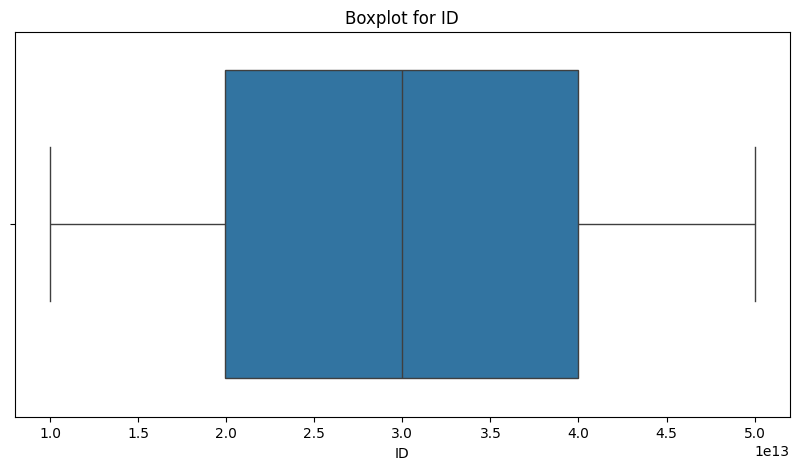

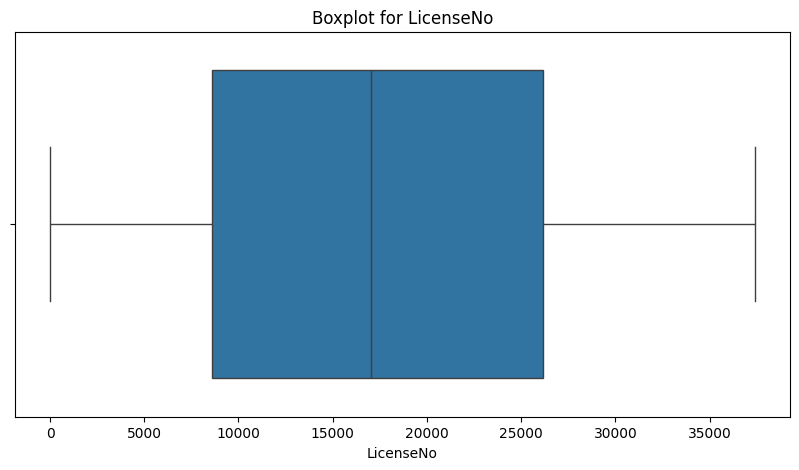

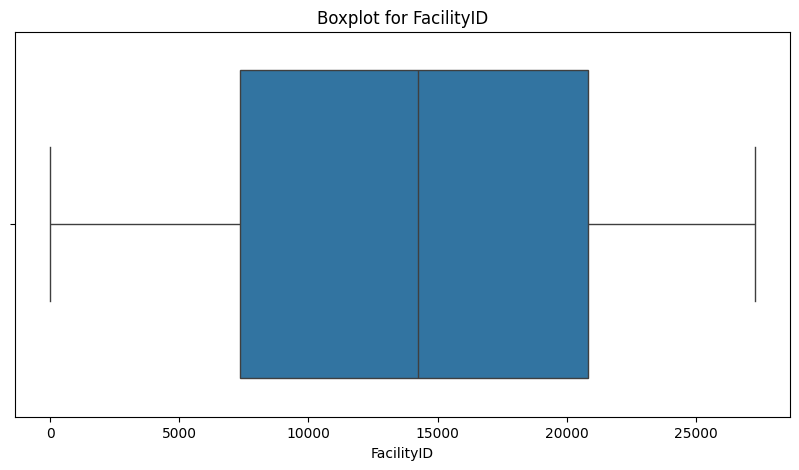

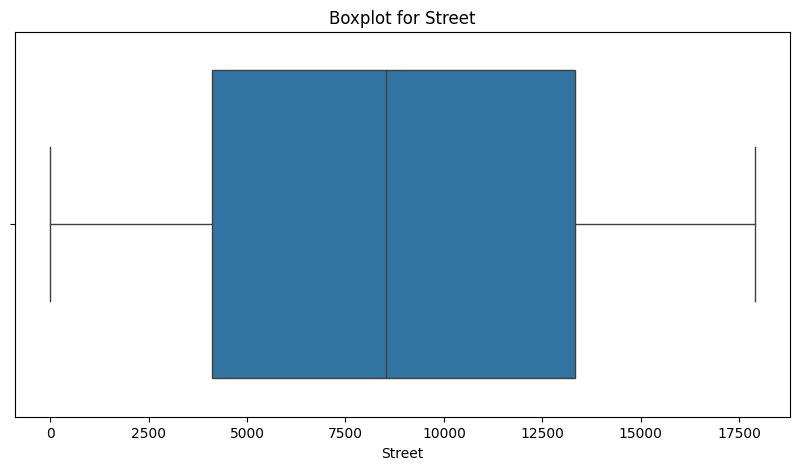

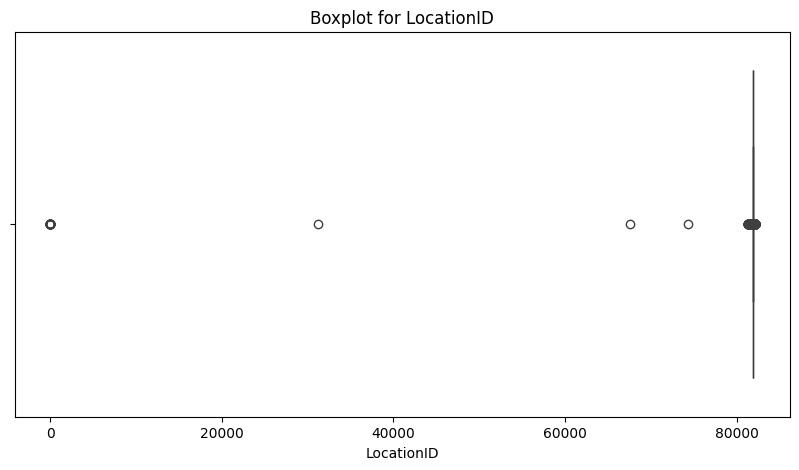

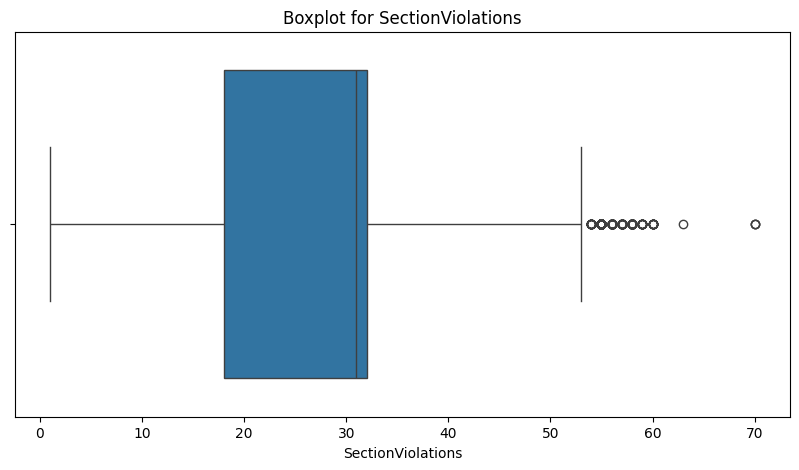

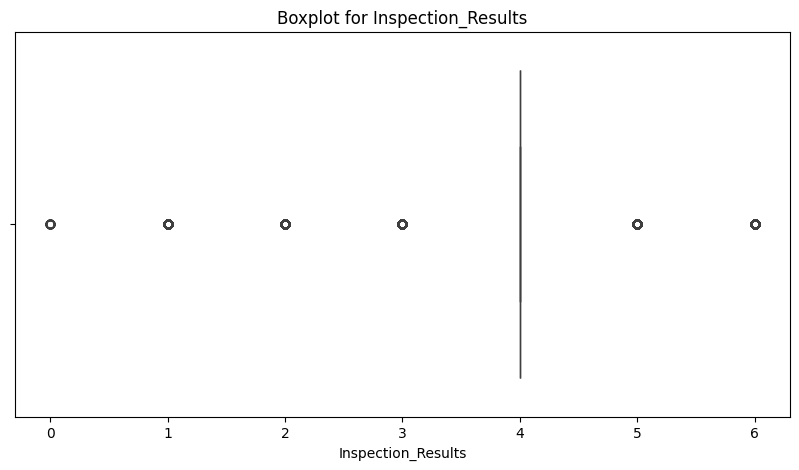

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Handling Outliers

In [ ]:


# Calculate the quartiles and IQR
Q1 = df['SectionViolations'].quantile(0.25)
Q3 = df['SectionViolations'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to remove outliers
df_no_outliers = df[(df['SectionViolations'] >= lower_bound) & (df['SectionViolations'] <= upper_bound)]

# Display the dataframe without outliers
print(df_no_outliers)

                  ID       Date  LicenseNo  FacilityID FacilityName  \
0       3.110350e+13 2010-04-26       4744        8123         7715   
1       1.008900e+13 2009-06-21       2973       12268        11664   
2       4.014900e+13 2013-05-01      18223        1112          969   
3       3.715770e+13 2015-09-28      20825       20007        19115   
4       4.747800e+13 2015-12-09       2136       16867        10409   
...              ...        ...        ...         ...          ...   
147438  3.261690e+13 2015-06-15      23001       19617        18736   
147439  3.833520e+13 2010-11-28      35329       21729        20760   
147440  4.269340e+13 2014-09-23       5361       12685        12038   
147441  4.908700e+13 2018-01-25      12338       10898        10324   
147442  1.671460e+13 2012-02-14      18743        1392         1249   

                                Type  Street         City       State  \
0                         RESTAURANT   15522  id-11235901  id_1890134   
1

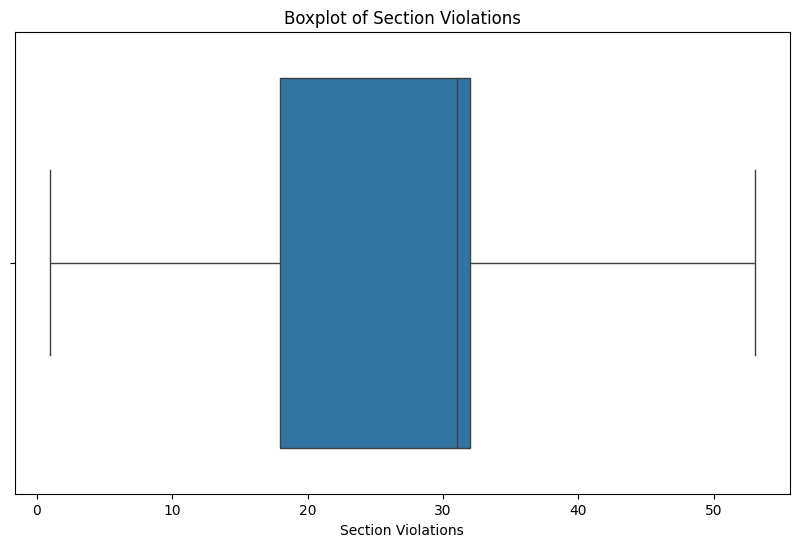

In [ ]:
# Plot boxplot for SectionViolations using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='SectionViolations')
plt.title('Boxplot of Section Violations')
plt.xlabel('Section Violations')
plt.show()

In [ ]:
# Calculate skewness for numerical columns
skewness = df.skew(numeric_only=True)
print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 ID                     0.000156
LicenseNo              0.189995
FacilityID            -0.061151
Street                 0.042627
LocationID           -64.138731
SectionViolations     -0.999486
Inspection_Results    -0.730292
dtype: float64


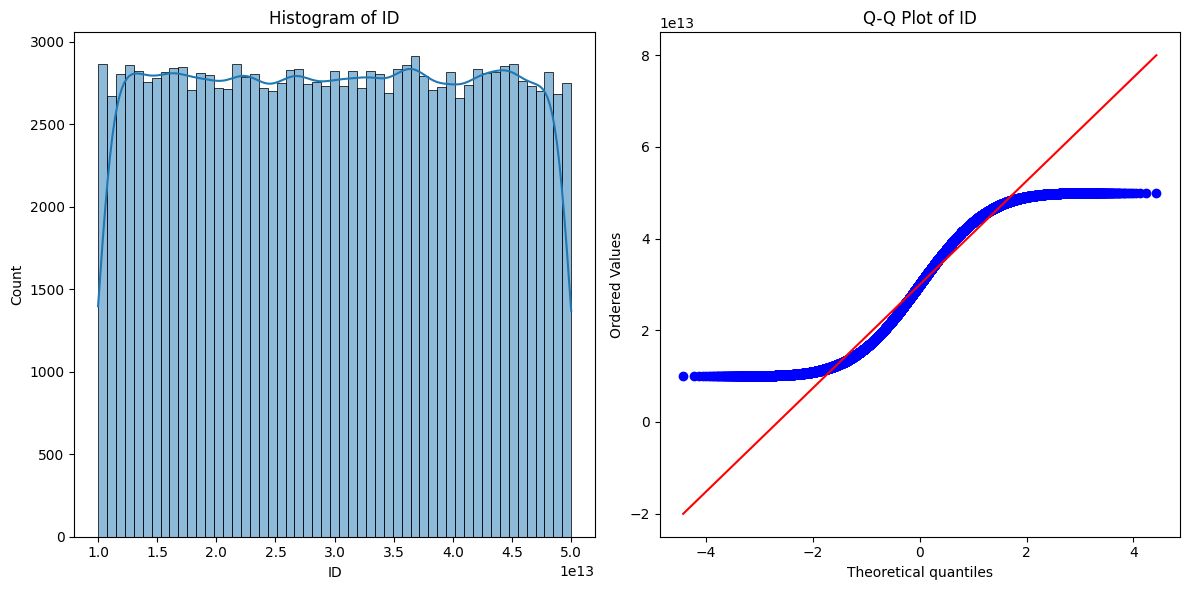

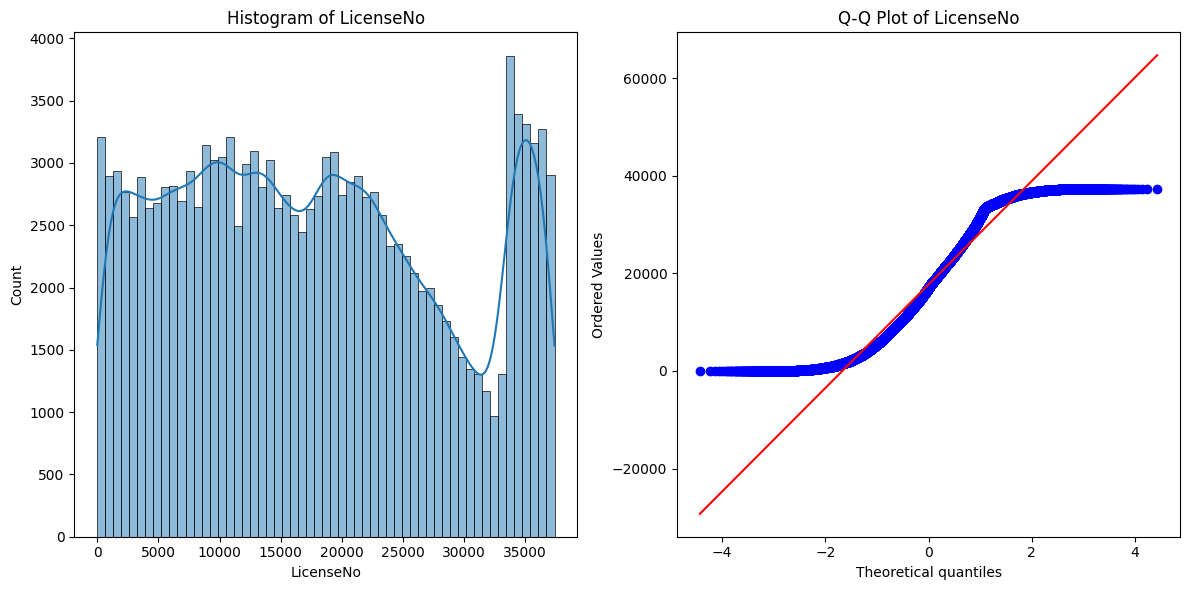

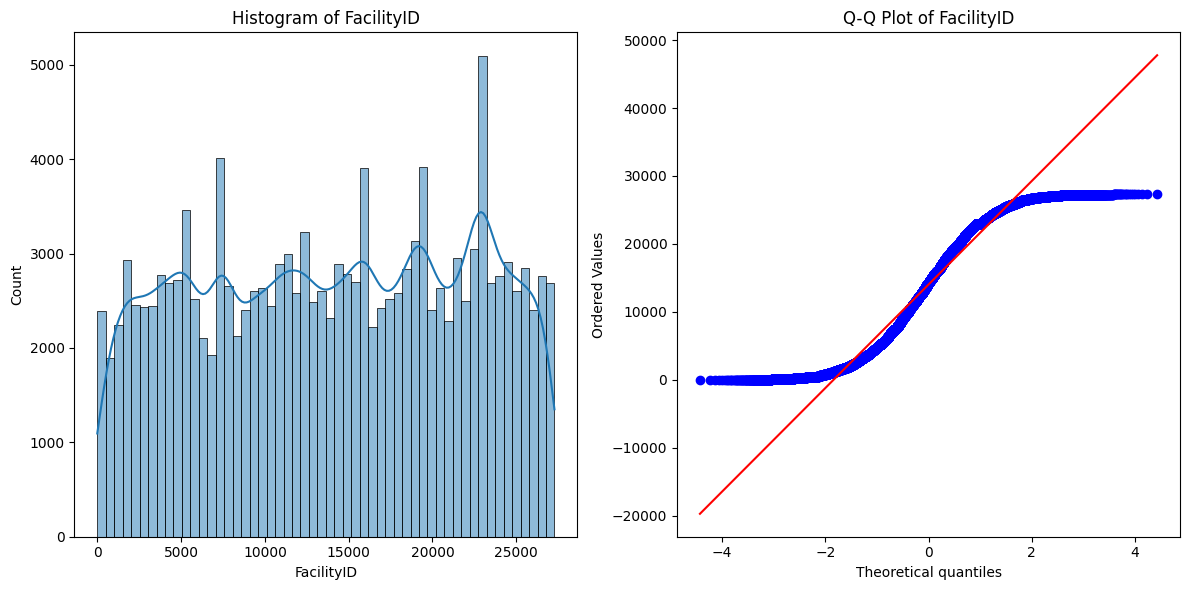

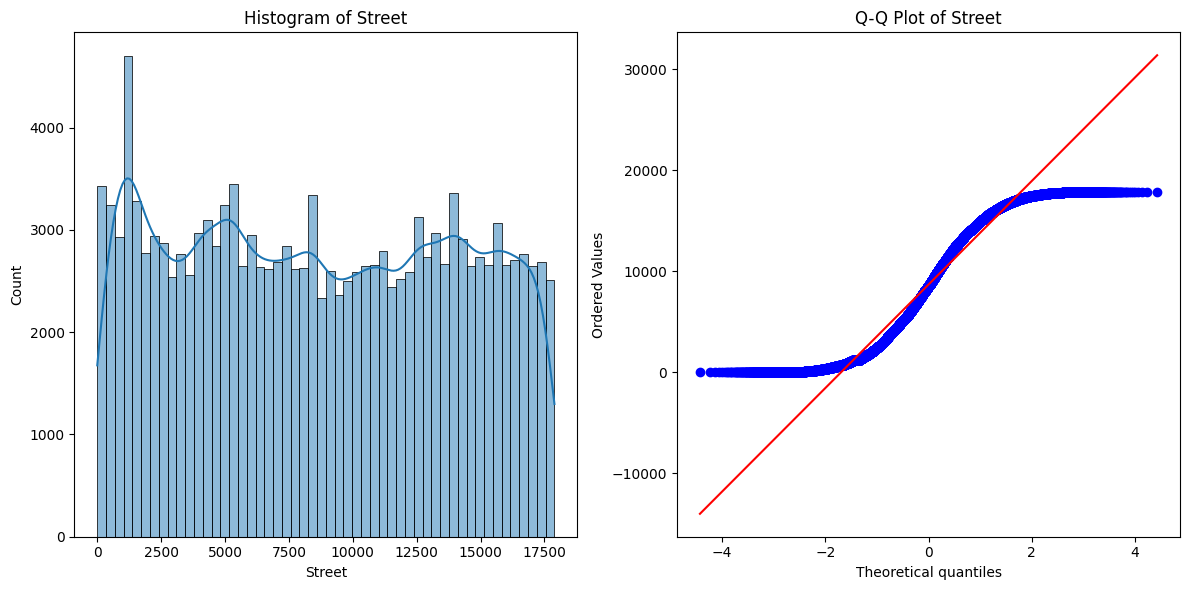

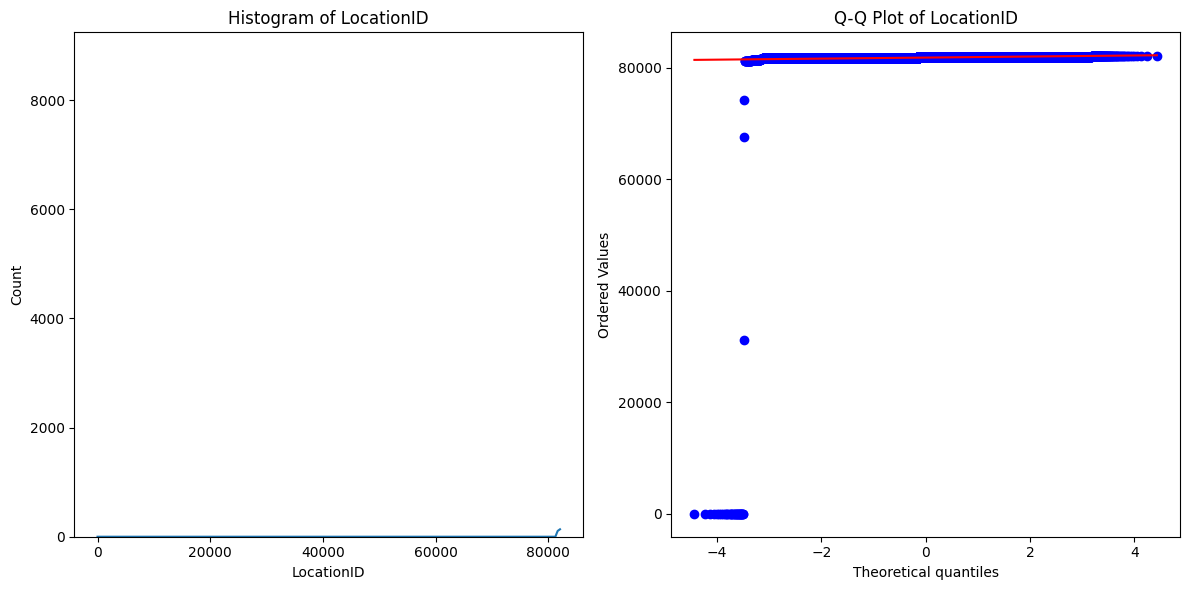

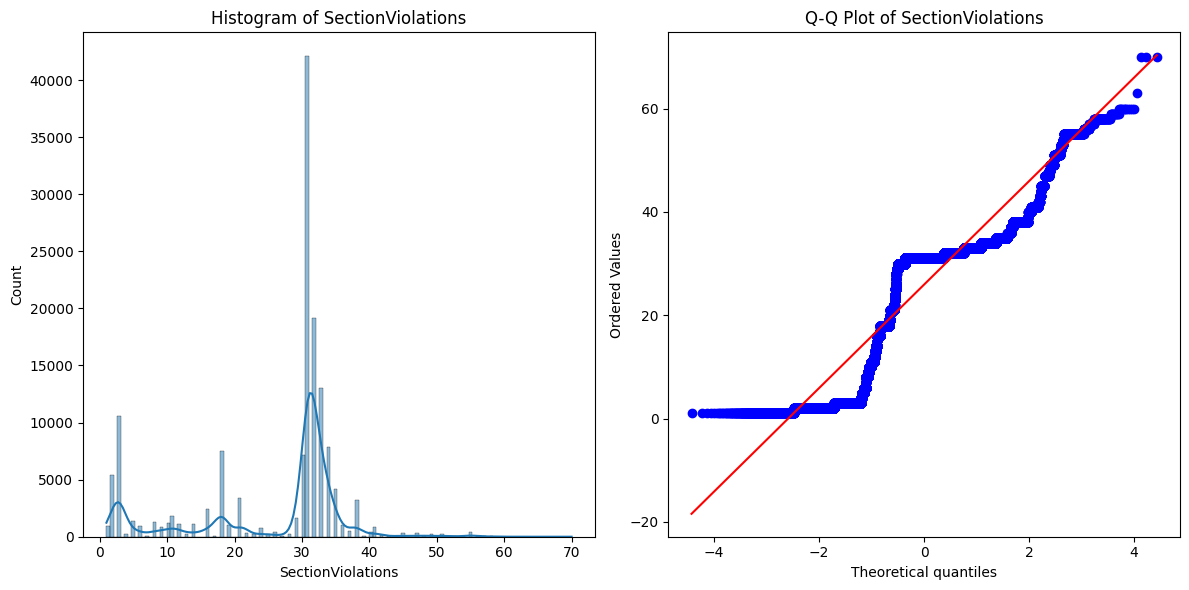

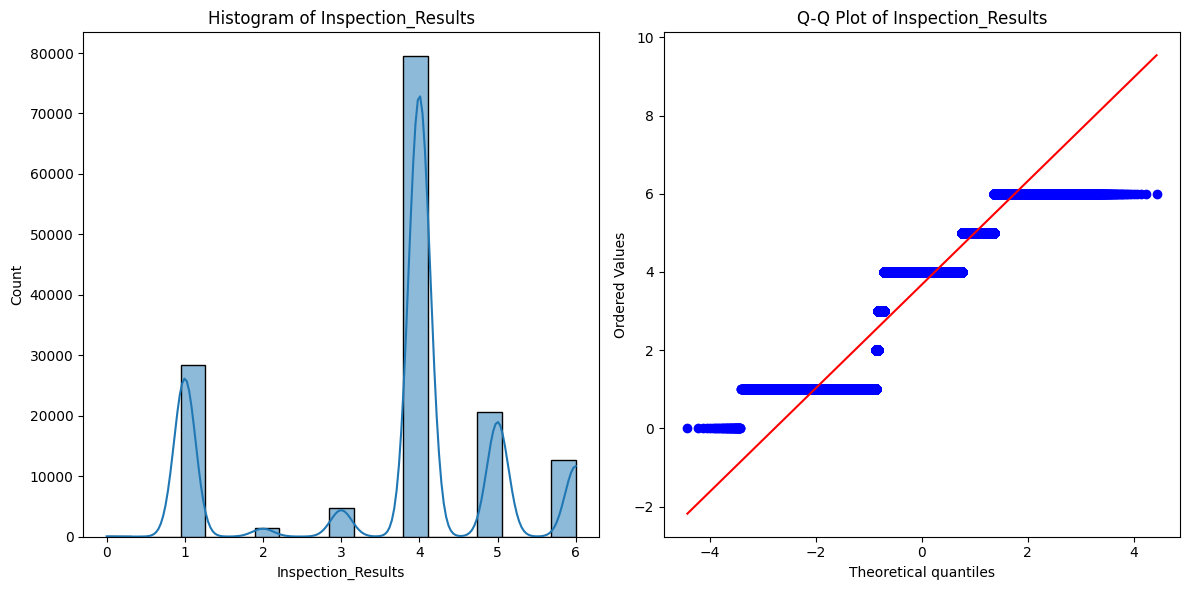

In [ ]:
import scipy.stats as stats
# Function to create histograms and Q-Q plots
def visualize_skewness(data, column):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

    plt.tight_layout()
    plt.show()

# Visualize skewness for each numerical column
for col in df.select_dtypes(include=[float, int]).columns:
    visualize_skewness(df, col)

Bais And mitigation

Risk Level Distribution:
RiskLevel
High         0.717470
Medium       0.195357
Low          0.087030
Uncertain    0.000142
Name: proportion, dtype: float64


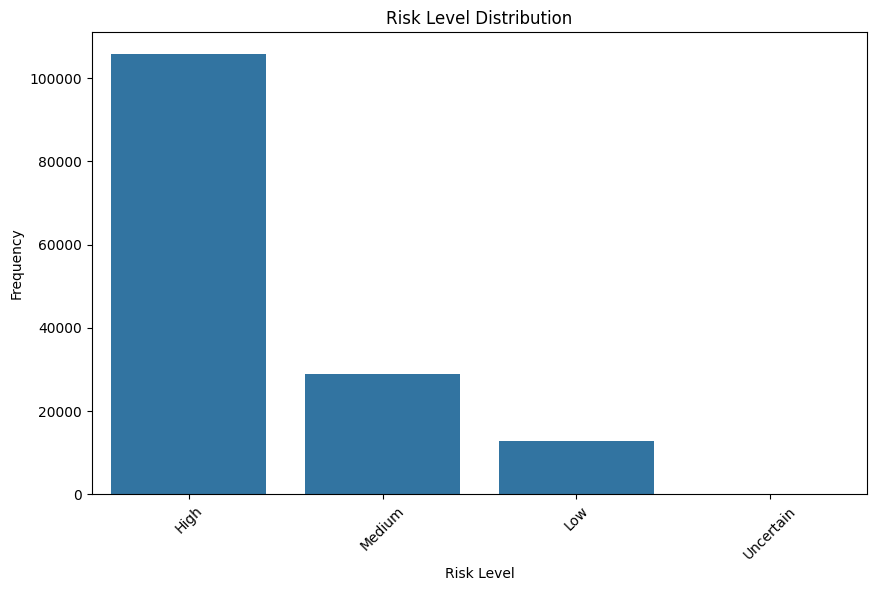

In [ ]:
risk_level_distribution = df['RiskLevel'].value_counts(normalize=True)

# Print Risk Level Distribution
print('Risk Level Distribution:')
print(risk_level_distribution)

# Plot bar plot for RiskLevel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='RiskLevel', order=risk_level_distribution.index)
plt.title('Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Mitigation (Example: balancing classes in 'RiskLevel')
from sklearn.utils import resample

# Example of balancing classes by resampling
majority_class = df[df['RiskLevel'] == df['RiskLevel'].mode()[0]]
minority_classes = df[df['RiskLevel'] != df['RiskLevel'].mode()[0]]

# Upsample minority classes
upsampled_minority_classes = resample(minority_classes,
                                      replace=True,    # sample with replacement
                                      n_samples=len(majority_class), # to match majority class
                                      random_state=42) # reproducible results

# Combine majority and upsampled minority classes
df_balanced = pd.concat([majority_class, upsampled_minority_classes])

print('Balanced Risk Level Distribution:')
print(df_balanced['RiskLevel'].value_counts(normalize=True))

Balanced Risk Level Distribution:
RiskLevel
High         0.500000
Medium       0.345169
Low          0.154586
Uncertain    0.000246
Name: proportion, dtype: float64


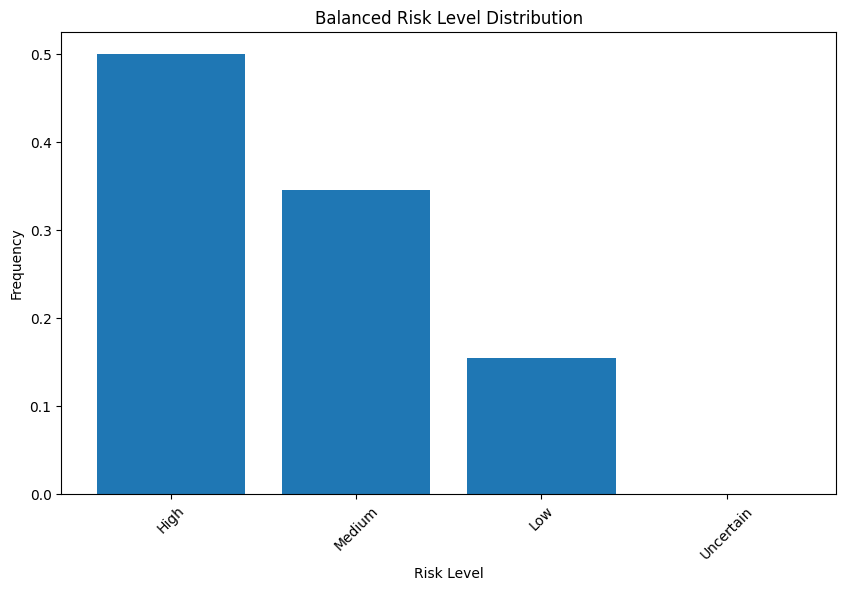

In [ ]:
data = {
    'RiskLevel': ['High', 'Medium', 'Low', 'Uncertain'],
    'Frequency': [0.500000, 0.345169, 0.154586, 0.000246]
}
df_balanced = pd.DataFrame(data)

# Plot bar plot for balanced risk level distribution
plt.figure(figsize=(10, 6))
plt.bar(df_balanced['RiskLevel'], df_balanced['Frequency'])
plt.title('Balanced Risk Level Distribution')
plt.xlabel('Risk Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Frequency Table for Reason:
                                    Reason  Frequency
0                                  CANVASS      77943
1                                  LICENSE      19645
2                    CANVASS RE-INSPECTION      15705
3                                COMPLAINT      13572
4                    LICENSE RE-INSPECTION       6796
5                  COMPLAINT RE-INSPECTION       5655
6                     SHORT FORM COMPLAINT       5094
7                 SUSPECTED FOOD POISONING        631
8                             CONSULTATION        503
9                              TAG REMOVAL        456
10                      LICENSE-TASK FORCE        444
11                       RECENT INSPECTION        248
12                         OUT OF BUSINESS        220
13                  TASK FORCE LIQUOR 1475        187
14  SUSPECTED FOOD POISONING RE-INSPECTION        147
15                          COMPLAINT-FIRE        120
16               SHORT FORM FIRE-COMPLAINT         77


<ipython-input-24-537f07a71b5a>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_frequency, x='Reason', y='Frequency', palette="husl")


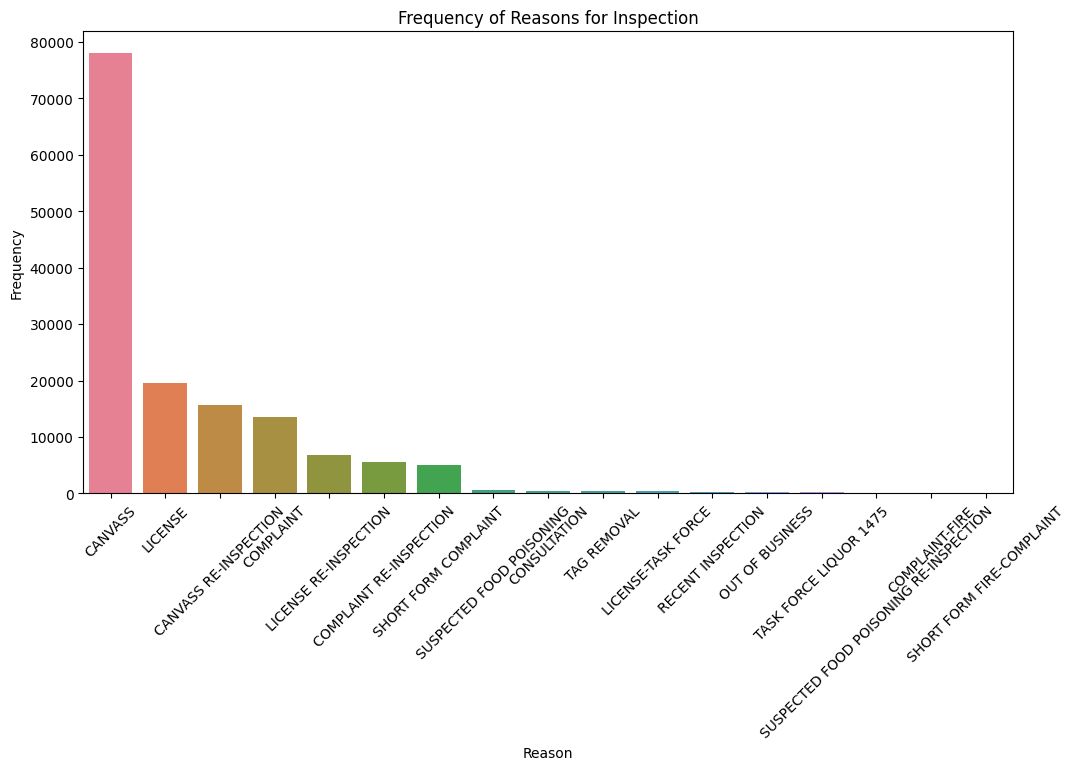

In [ ]:

# Create frequency table for 'Reason'
reason_frequency = df['Reason'].value_counts().reset_index()
reason_frequency.columns = ['Reason', 'Frequency']
print('Frequency Table for Reason:')
print(reason_frequency)



# Plot frequency table for 'Reason' with different colors
plt.figure(figsize=(12, 6))
sns.barplot(data=reason_frequency, x='Reason', y='Frequency', palette="husl")
plt.title('Frequency of Reasons for Inspection')
plt.xlabel('Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Balanced distribution:
Reason
CANVASS                                   20000
LICENSE                                   19645
CANVASS RE-INSPECTION                     15705
COMPLAINT                                 13572
LICENSE RE-INSPECTION                      6796
COMPLAINT RE-INSPECTION                    5655
SHORT FORM COMPLAINT                       5094
SUSPECTED FOOD POISONING                    631
CONSULTATION                                503
TAG REMOVAL                                 456
LICENSE-TASK FORCE                          444
RECENT INSPECTION                           248
OUT OF BUSINESS                             220
TASK FORCE LIQUOR 1475                      187
SUSPECTED FOOD POISONING RE-INSPECTION      147
COMPLAINT-FIRE                              120
SHORT FORM FIRE-COMPLAINT                    77
Name: count, dtype: int64


<ipython-input-25-f40966eb005a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_balanced, x='Reason', palette="husl", order=df_balanced['Reason'].value_counts().index)


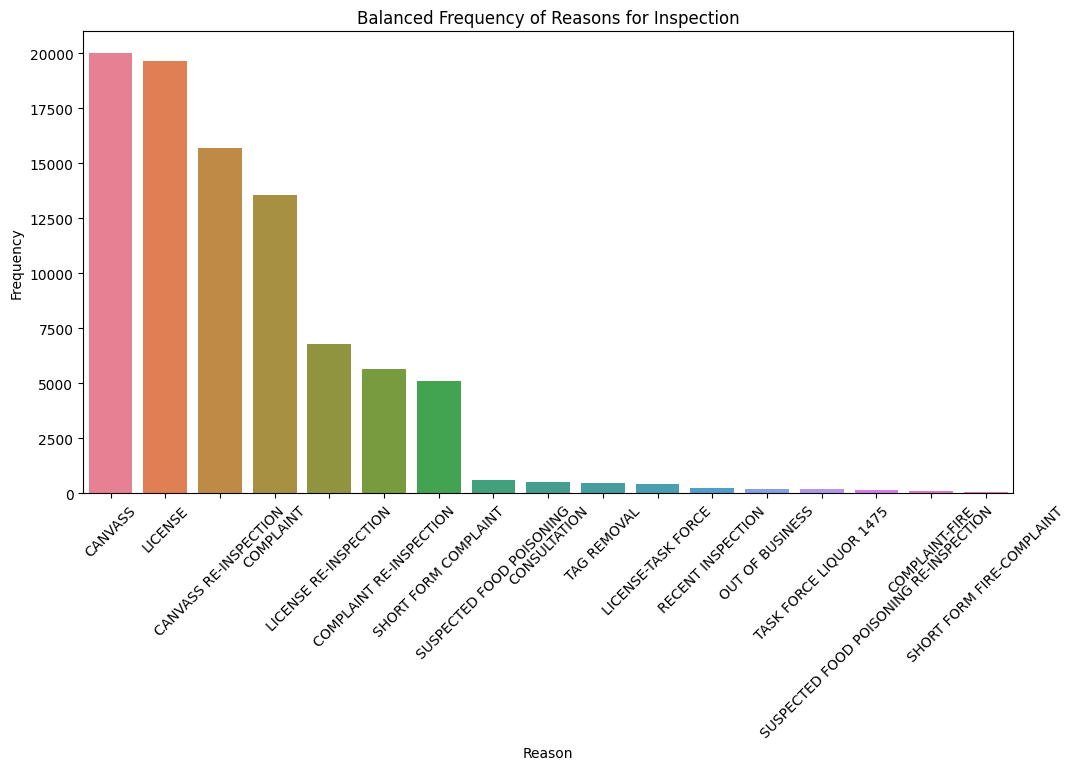

In [ ]:
majority_class = df[df['Reason'] == 'CANVASS']
minority_classes = df[df['Reason'] != 'CANVASS']

# Downsample majority class
majority_downsampled = resample(majority_class,
                                replace=False,  # sample without replacement
                                n_samples=20000,  # desired number of samples
                                random_state=42)  # reproducible results

# Combine minority classes with downsampled majority class
df_balanced = pd.concat([majority_downsampled, minority_classes])

# Print the new distribution
print("\nBalanced distribution:")
print(df_balanced['Reason'].value_counts())

# Plot the balanced distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_balanced, x='Reason', palette="husl", order=df_balanced['Reason'].value_counts().index)
plt.title('Balanced Frequency of Reasons for Inspection')
plt.xlabel('Reason')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

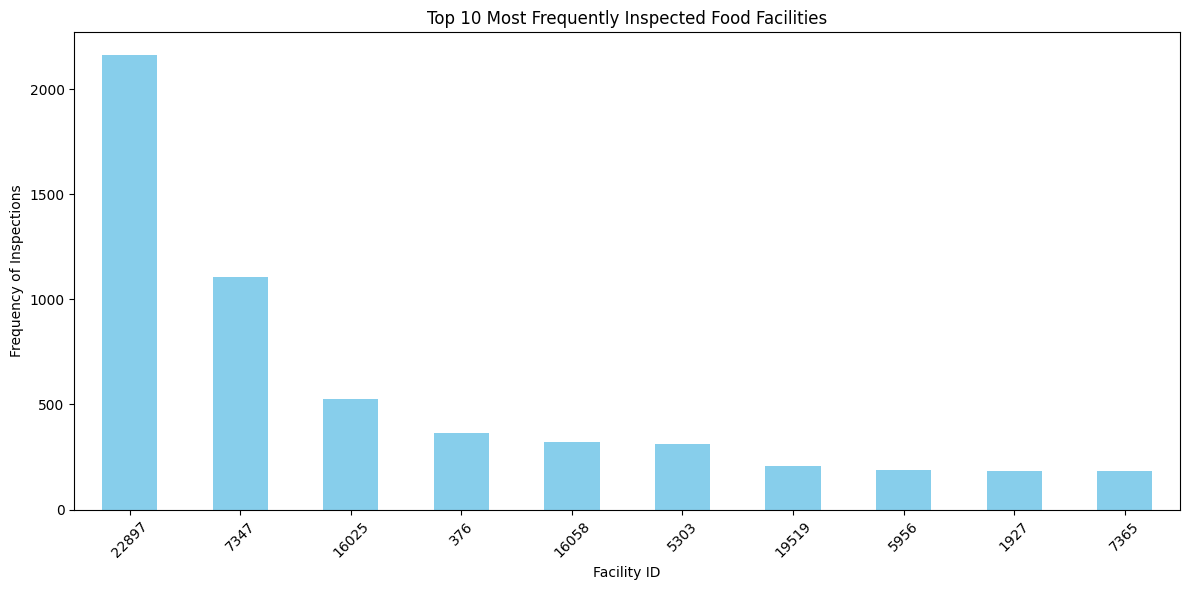

In [ ]:
# Group the data by FacilityName and count the occurrences
facility_counts = df['FacilityID'].value_counts().head(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
facility_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Frequently Inspected Food Facilities')
plt.xlabel('Facility ID')
plt.ylabel('Frequency of Inspections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

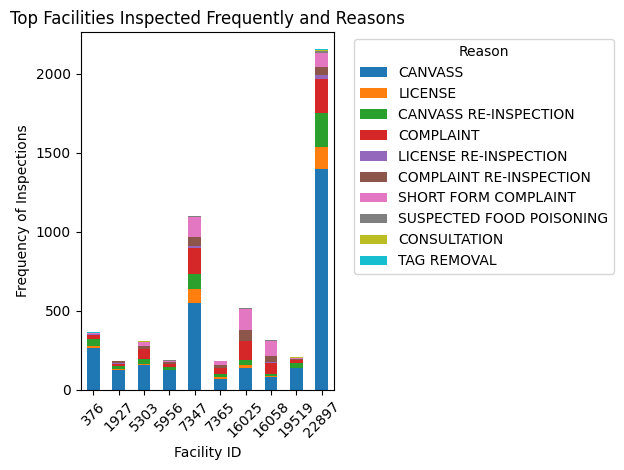

In [ ]:
# Find the top 10 most frequently inspected facilities
top_facilities = df['FacilityID'].value_counts().head(10).index

# Group the data by FacilityName and Reason, and count the occurrences
facility_reason_counts = df[df['FacilityID'].isin(top_facilities)].groupby(['FacilityID', 'Reason']).size().unstack().fillna(0)

# Find the top 10 reasons for inspections
top_reasons = df['Reason'].value_counts().head(10).index

# Filter the data to include only the top 10 reasons
top_facility_reason_counts = facility_reason_counts[top_reasons]

# Plot the grouped bar graph
plt.figure(figsize=(14, 8))
top_facility_reason_counts.plot(kind='bar', stacked=True)
plt.title('Top Facilities Inspected Frequently and Reasons')
plt.xlabel('Facility ID')
plt.ylabel('Frequency of Inspections')
plt.xticks(rotation=45)
plt.legend(title='Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Inspection_Results
0       27
1    18479
2     1390
3     2097
4    52258
5    11798
6     3451
Name: count, dtype: int64


<ipython-input-28-85d05a888c93>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inspection_results_frequency.index, y=inspection_results_frequency.values, palette=colors)


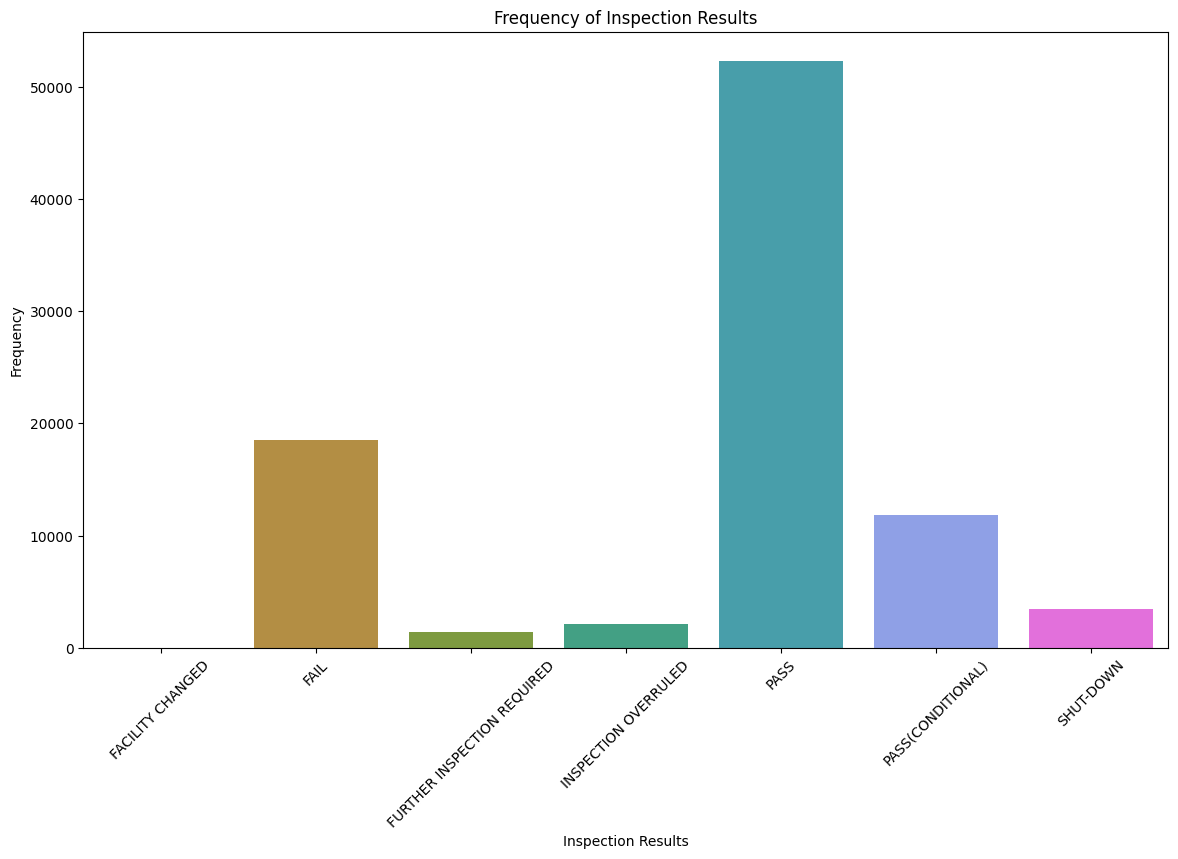

In [ ]:
# Define the inspection results mapping
inspection_results_mapping = {
    0: 'FACILITY CHANGED',
    1: 'FAIL',
    2: 'FURTHER INSPECTION REQUIRED',
    3: 'INSPECTION OVERRULED',
    4: 'PASS',
    5: 'PASS(CONDITIONAL)',
    6: 'SHUT-DOWN'
}

# Create a frequency table for 'Inspection_Results'
inspection_results_frequency = df_balanced['Inspection_Results'].value_counts().sort_index()
print(inspection_results_frequency)
# Replace the index with the mapped values
inspection_results_frequency.index = inspection_results_frequency.index.map(inspection_results_mapping)

# Plot the frequency table
plt.figure(figsize=(14, 8))
colors = sns.color_palette("husl", len(inspection_results_frequency))
sns.barplot(x=inspection_results_frequency.index, y=inspection_results_frequency.values, palette=colors)
plt.title('Frequency of Inspection Results')
plt.xlabel('Inspection Results')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.utils import resample

# Example of balancing classes by resampling
majority_class = df[df['Inspection_Results'] == df['Inspection_Results'].mode()[0]]
minority_classes = df[df['Inspection_Results'] != df['Inspection_Results'].mode()[0]]

# Upsample minority classes
upsampled_minority_classes = resample(minority_classes,
                                      replace=True,    # sample with replacement
                                      n_samples=len(majority_class), # to match majority class
                                      random_state=42) # reproducible results

# Combine majority and upsampled minority classes
df_balanced = pd.concat([majority_class, upsampled_minority_classes])

print('Balanced Inspection Results Distribution:')
print(df_balanced['Inspection_Results'].value_counts(normalize=True))

Balanced Inspection Results Distribution:
Inspection_Results
4    0.500000
1    0.210395
5    0.151631
6    0.092218
3    0.034838
2    0.010553
0    0.000365
Name: proportion, dtype: float64


<ipython-input-30-bec21b32e3de>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Inspection_Results', y='Proportion', data=balanced_df, palette=colors)


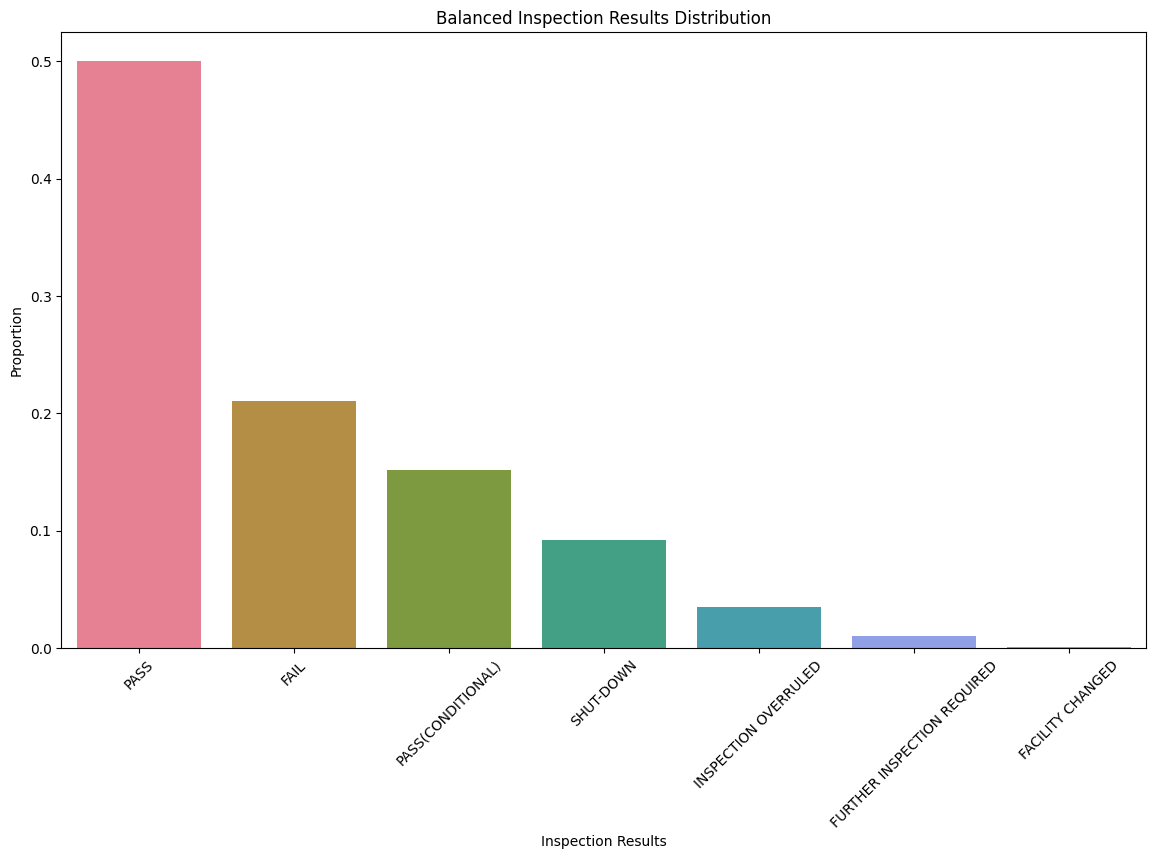

In [ ]:

# Balanced inspection results distribution
balanced_inspection_results_distribution = {
    4: 0.500000,
    1: 0.210395,
    5: 0.151631,
    6: 0.092218,
    3: 0.034838,
    2: 0.010553,
    0: 0.000365
}

# Define the inspection results mapping
inspection_results_mapping = {
    0: 'FACILITY CHANGED',
    1: 'FAIL',
    2: 'FURTHER INSPECTION REQUIRED',
    3: 'INSPECTION OVERRULED',
    4: 'PASS',
    5: 'PASS(CONDITIONAL)',
    6: 'SHUT-DOWN'
}

# Convert the dictionary to a DataFrame for plotting
balanced_df = pd.DataFrame(list(balanced_inspection_results_distribution.items()), columns=['Inspection_Results', 'Proportion'])
balanced_df['Inspection_Results'] = balanced_df['Inspection_Results'].map(inspection_results_mapping)

# Plot the balanced inspection results distribution
plt.figure(figsize=(14, 8))
colors = sns.color_palette("husl", len(balanced_df))
sns.barplot(x='Inspection_Results', y='Proportion', data=balanced_df, palette=colors)
plt.title('Balanced Inspection Results Distribution')
plt.xlabel('Inspection Results')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()


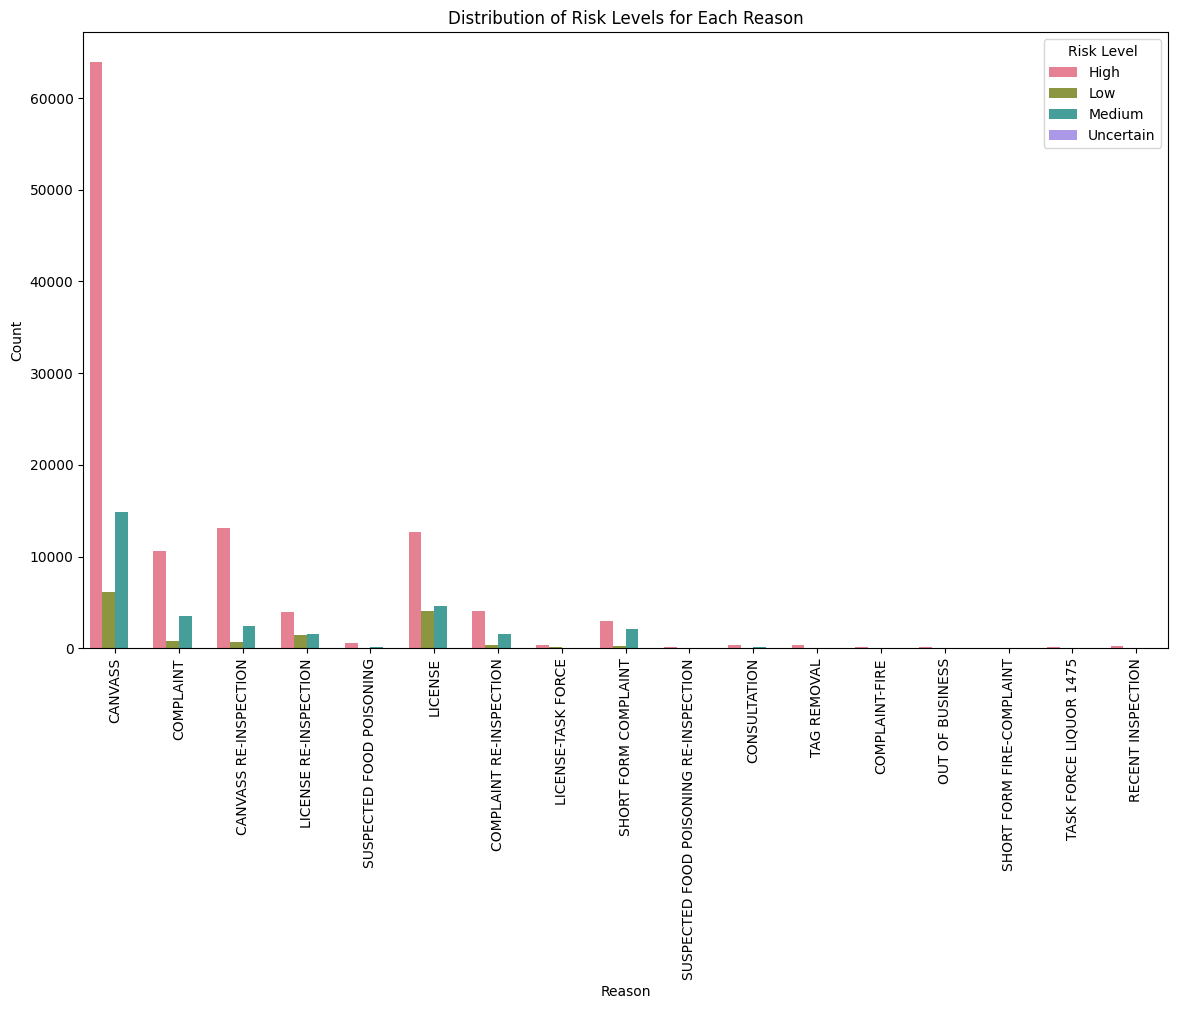

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_balanced, x='Reason', hue='RiskLevel', palette="husl")
plt.title('Distribution of Risk Levels for Each Reason')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Risk Level')
plt.show()

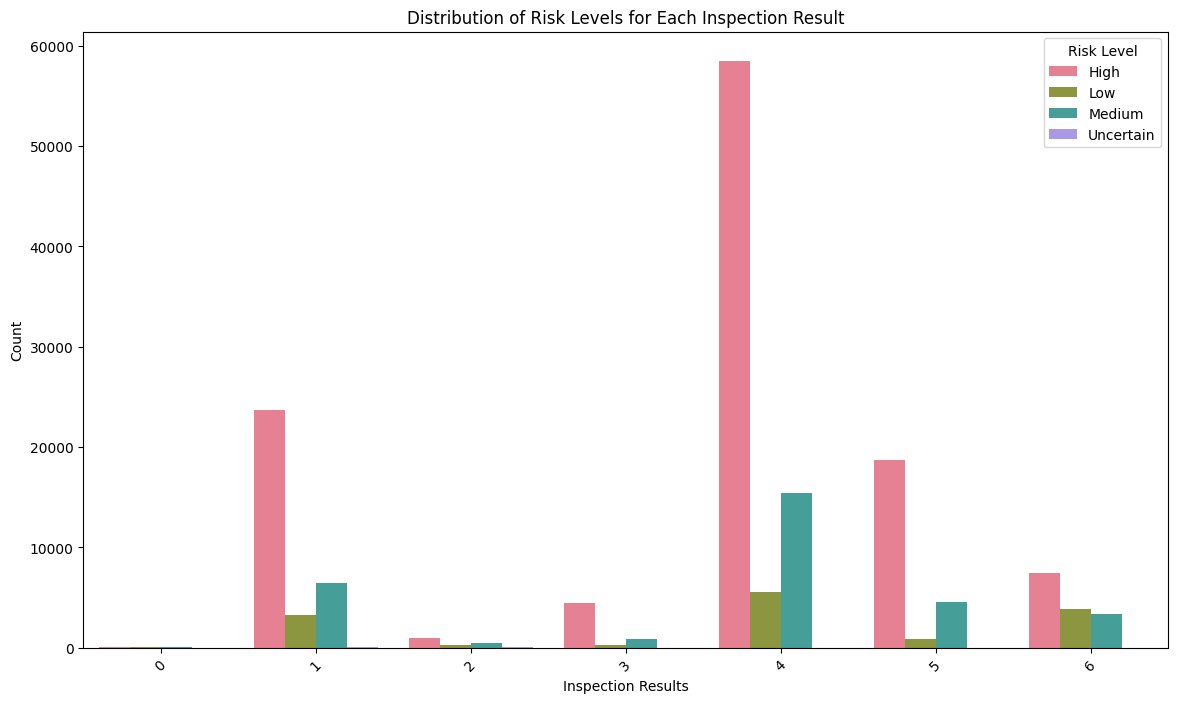

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_balanced, x='Inspection_Results', hue='RiskLevel', palette="husl")
plt.title('Distribution of Risk Levels for Each Inspection Result')
plt.xlabel('Inspection Results')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk Level')
plt.show()

<ipython-input-33-bb03c1c16e40>:10: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(x='Type', hue='RiskLevel', data=top_10_df, palette=colors)


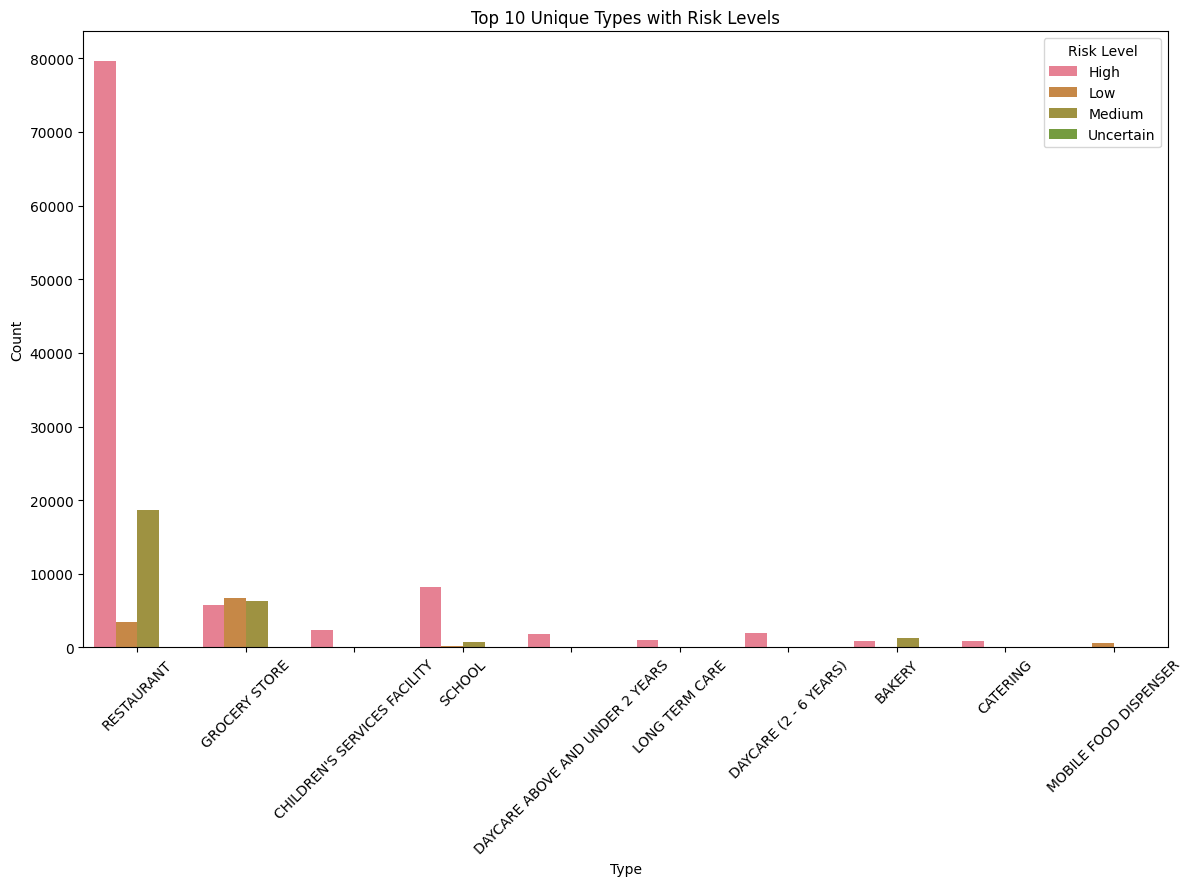

In [ ]:
# Identify the top 10 unique types
top_10_types = df['Type'].value_counts().head(10).index

# Subset the data to include only the top 10 types
top_10_df = df[df['Type'].isin(top_10_types)]

# Create the plot
plt.figure(figsize=(14, 8))
colors = sns.color_palette("husl", len(top_10_types))
sns.countplot(x='Type', hue='RiskLevel', data=top_10_df, palette=colors)
plt.title('Top 10 Unique Types with Risk Levels')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk Level')
plt.show()

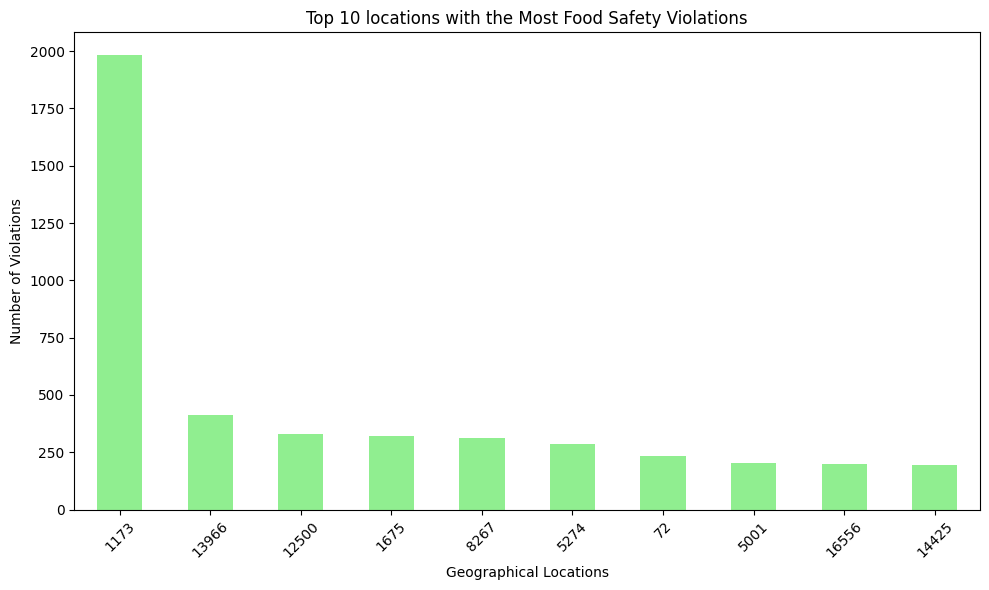

In [ ]:
violation_counts = df['Street'].value_counts().head(10)  # Change to 'State' if needed

# Plot the bar plot
plt.figure(figsize=(10, 6))
violation_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 10 locations with the Most Food Safety Violations')
plt.xlabel('Geographical Locations')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['SectionViolations'].unique()

array([33., 31., 30., 18., 32., 16.,  2., 21., 11., 34.,  3., 49., 35.,
       24.,  8., 38.,  9., 27., 36., 10., 29., 12.,  1., 22.,  5., 45.,
       26.,  4.,  6., 28., 14., 47., 44., 51., 25., 40., 56., 19., 37.,
       55., 41., 13., 42., 23., 52., 53., 39., 48., 15., 43., 57., 58.,
       20.,  7., 50., 17., 54., 60., 70., 63., 59.])

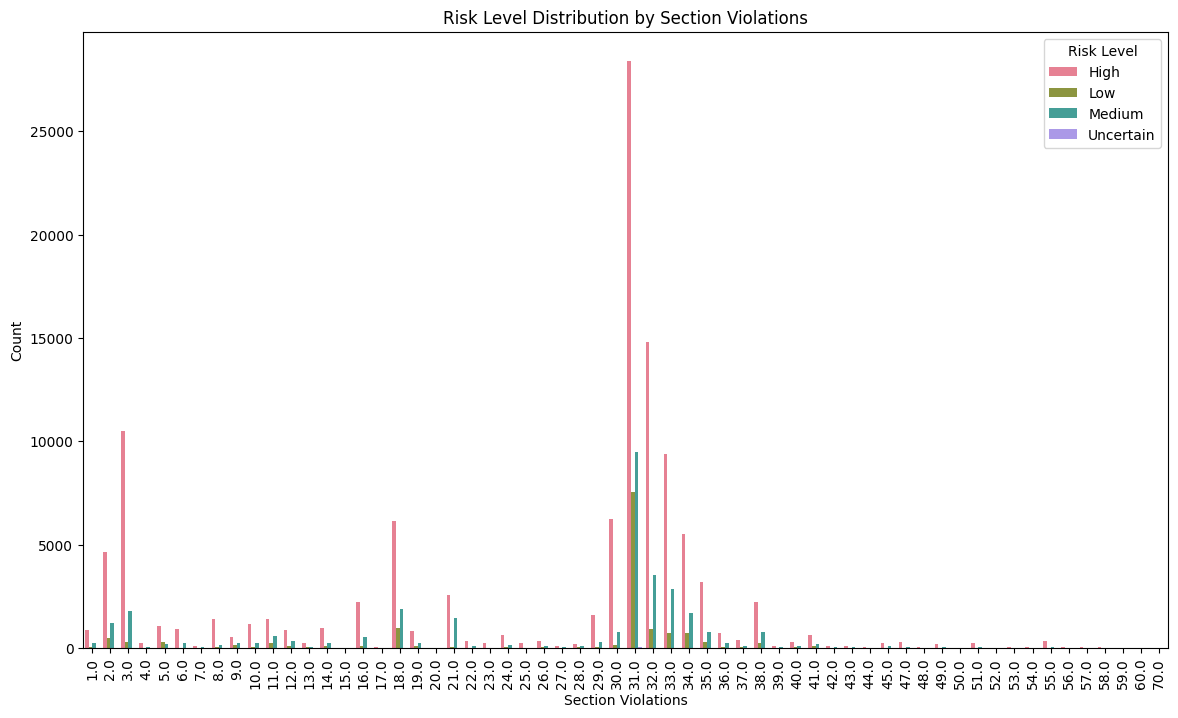

In [ ]:
section_risk_count = df_balanced.groupby(['SectionViolations', 'RiskLevel']).size().reset_index(name='Count')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(x='SectionViolations', y='Count', hue='RiskLevel', data=section_risk_count, palette='husl')
plt.title('Risk Level Distribution by Section Violations')
plt.xlabel('Section Violations')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Risk Level')
plt.show()

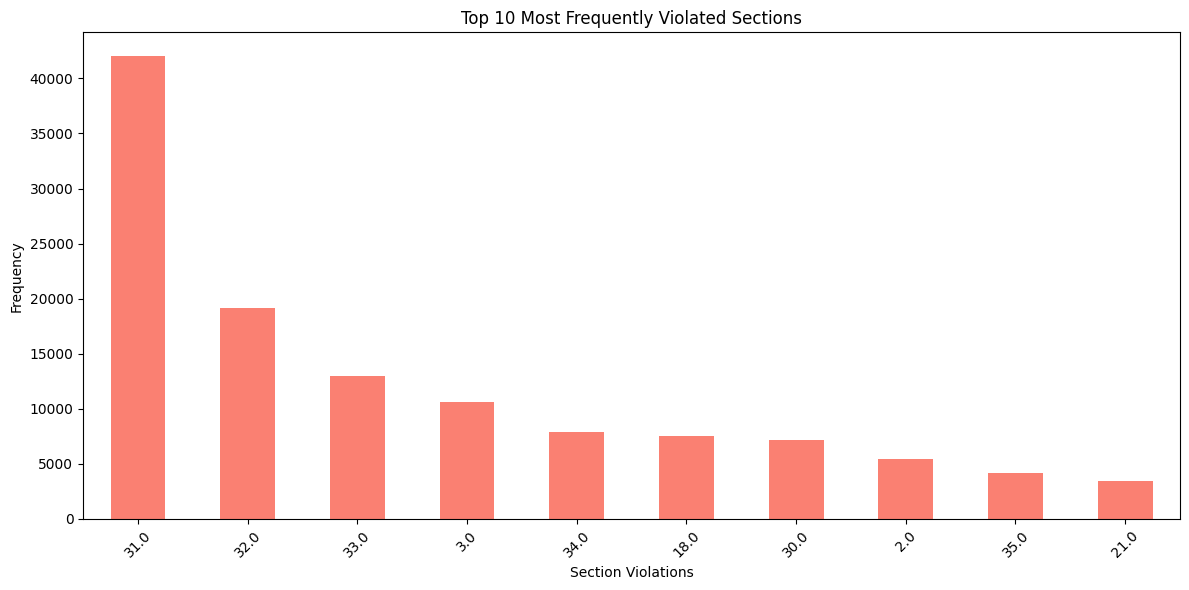

In [ ]:
section_violations_counts = df['SectionViolations'].value_counts().head(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
section_violations_counts.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Frequently Violated Sections')
plt.xlabel('Section Violations')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

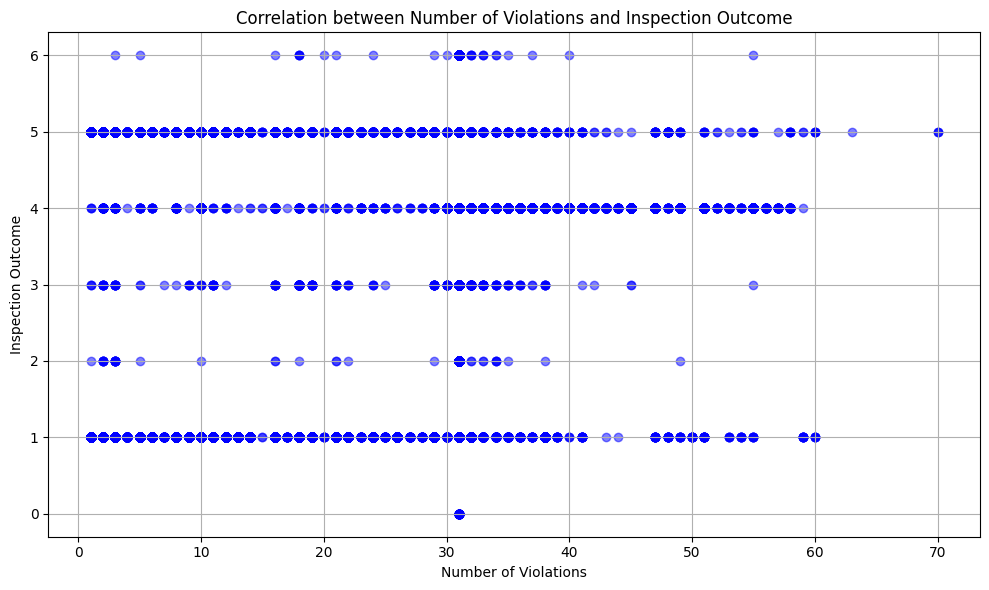

In [ ]:
# Define the x-axis (number of violations) and y-axis (inspection outcome)
x = df['SectionViolations']
y = df['Inspection_Results']

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, color='blue')
plt.title('Correlation between Number of Violations and Inspection Outcome')
plt.xlabel('Number of Violations')
plt.ylabel('Inspection Outcome')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-39-8788d478ff5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='RiskLevel', y='SectionViolations', data=df, jitter=True, palette='husl')


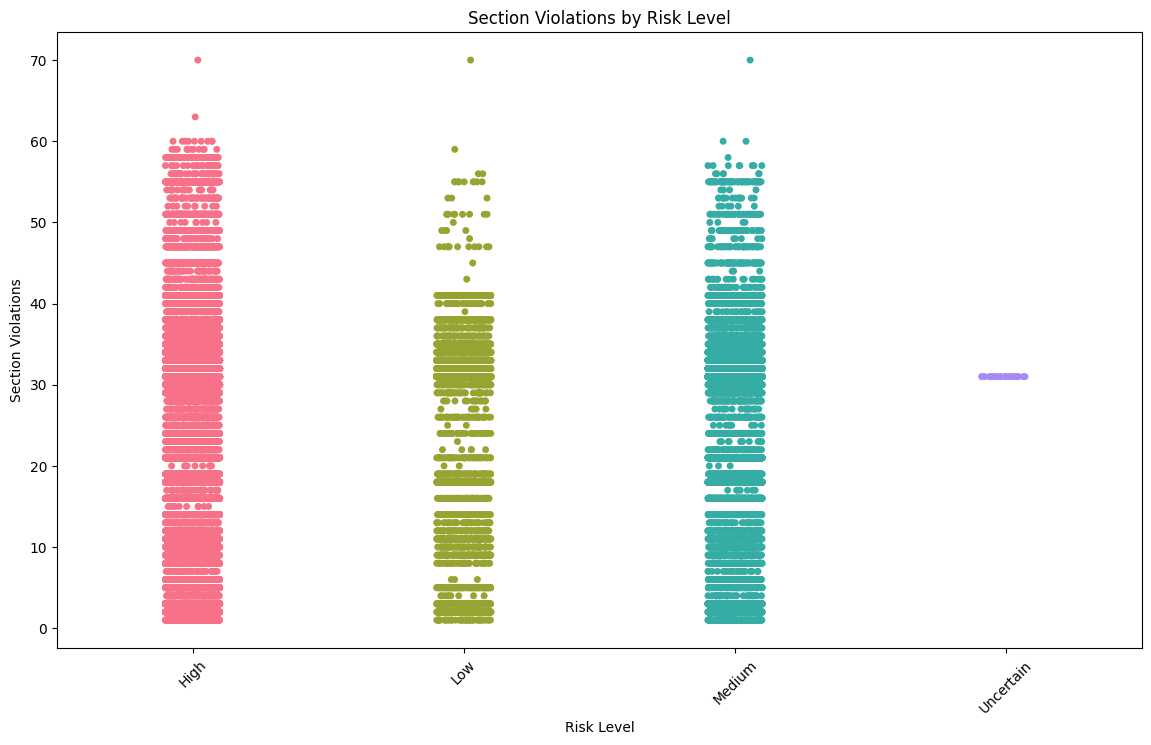

In [ ]:
# Create the plot
plt.figure(figsize=(14, 8))
sns.stripplot(x='RiskLevel', y='SectionViolations', data=df, jitter=True, palette='husl')
plt.title('Section Violations by Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Section Violations')
plt.xticks(rotation=45)
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix




# Encode categorical variables
label_encoders = {}
for column in ['FacilityName', 'Type', 'Street', 'City', 'State', 'Reason', 'RiskLevel', 'Inspection_Results']:
    le = LabelEncoder()
    df_balanced[column] = le.fit_transform(df_balanced[column])
    label_encoders[column] = le

# Normalize numerical features
scaler = StandardScaler()
df_balanced[['SectionViolations']] = scaler.fit_transform(df_balanced[['SectionViolations']])

# Define feature set and target variable
X = df_balanced.drop(['ID', 'Date', 'LicenseNo', 'FacilityID'], axis=1)
y = df_balanced['RiskLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)



Accuracy: 0.9073374866276509
Confusion Matrix:
[[22141   170   416     0]
 [  963  1549   306     0]
 [  934   152  5147     0]
 [    2     1     1     0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     22727
           1       0.83      0.55      0.66      2818
           2       0.88      0.83      0.85      6233
           3       0.00      0.00      0.00         4

    accuracy                           0.91     31782
   macro avg       0.66      0.59      0.61     31782
weighted avg       0.90      0.91      0.90     31782



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
